In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

2024-02-14 22:29:14.492651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
(x_train, y_train), (x_test, y_test ) = datasets.cifar10.load_data()

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
x_train.shape[-1]

3

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

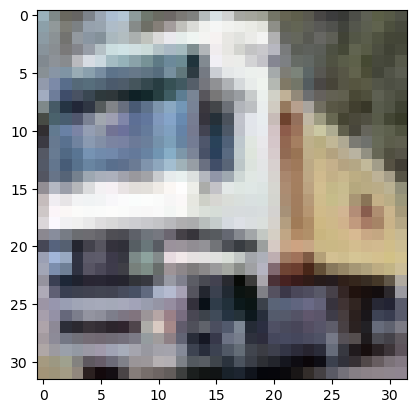

In [13]:
plt.imshow(x_train[1])

def plotsample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [14]:
import numpy as np

# Example 3D array
arr_3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

# Reshape the 3D array into a 2D array
arr_2d = arr_3d.reshape(-1, arr_3d.shape[-1])
arr = arr_3d.transpose(1, 0, 2)

print("Original 3D array:")
print(arr_3d)
print("Reshaped 2D array:")
print(arr)


Original 3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Reshaped 2D array:
[[[ 1  2  3]
  [ 7  8  9]]

 [[ 4  5  6]
  [10 11 12]]]


In [15]:
arr_2d = arr_3d.reshape(arr_3d.shape[-2], -1)

print("Original 3D array:")
print(arr_3d)
print("Reshaped 2D array:")
print(arr_2d)

Original 3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
Reshaped 2D array:
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


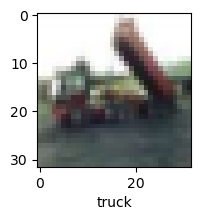

In [16]:
plotsample(x_train, y_train, 2)

In [17]:
x_train = x_train / 255
x_test = x_test / 255
x_train.shape

(50000, 32, 32, 3)

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9342 - accuracy: 0.3042
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7497 - accuracy: 0.3788
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6745 - accuracy: 0.4067
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6230 - accuracy: 0.4245
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5819 - accuracy: 0.4398
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5511 - accuracy: 0.4500
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5246 - accuracy: 0.4612
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5005 - accuracy: 0.4677
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4830 - accuracy: 0.4727
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.46

In [20]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.6252 - accuracy: 0.4270


[1.6252237558364868, 0.4269999861717224]

In [24]:

cnn = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4412 - accuracy: 0.4817
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0906 - accuracy: 0.6184
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9543 - accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8698 - accuracy: 0.6982
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8007 - accuracy: 0.7218
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7376 - accuracy: 0.7426
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6820 - accuracy: 0.7626
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6338 - accuracy: 0.7787
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5896 - accuracy: 0.7960
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [25]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0062 - accuracy: 0.6796


[1.0062096118927002, 0.6796000003814697]

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
classification_report(y_test, y_pred_classes)

313/313 [==============================] - 2s 7ms/step


'              precision    recall  f1-score   support\n\n           0       0.71      0.66      0.69      1000\n           1       0.84      0.72      0.78      1000\n           2       0.57      0.62      0.59      1000\n           3       0.51      0.52      0.52      1000\n           4       0.64      0.67      0.65      1000\n           5       0.73      0.45      0.55      1000\n           6       0.74      0.77      0.76      1000\n           7       0.80      0.67      0.73      1000\n           8       0.69      0.85      0.76      1000\n           9       0.65      0.86      0.74      1000\n\n    accuracy                           0.68     10000\n   macro avg       0.69      0.68      0.68     10000\nweighted avg       0.69      0.68      0.68     10000\n'

In [29]:
y_pred_classes[:5]

[8, 8, 8, 0, 6]